In [1]:
#loading the dataset
#how many rows(students) in the dataset
import pandas as pd
import numpy as np
d = pd.read_csv('C:\Python\Datasets\student datset\student-por.csv', sep=';')  
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [2]:
# generating a binary label (pass/fail) G1+G2+G3 (Tests grades each 0-20points); to pass sum>=30 and removing the G1,2,3 Columns
#apply(row) pandas function, axis=1 is row, axis=0 is column
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1) 
d = d.drop(['G1','G2','G3'], axis=1)
d.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [3]:
# use one-hot encoding on categorical colums  (turn words into binary data)
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic'])
d.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [4]:
# shuffling rows
d= d.sample(frac=1)

#splitting training and testing data
d_train = d[:500]   #first 500
d_test = d[500:]    #everything after 500

#removing "pass" column and saving it for later
d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_train.drop(['pass'], axis=1)
d_test_pass = d_train['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

#How many passing students in class 
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float((np.sum(d_pass) / len(d_pass)))))

Passing: 328 out of 649 (50.54%)


In [13]:
#config decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
t = t.fit(d_train_att, d_train_pass)


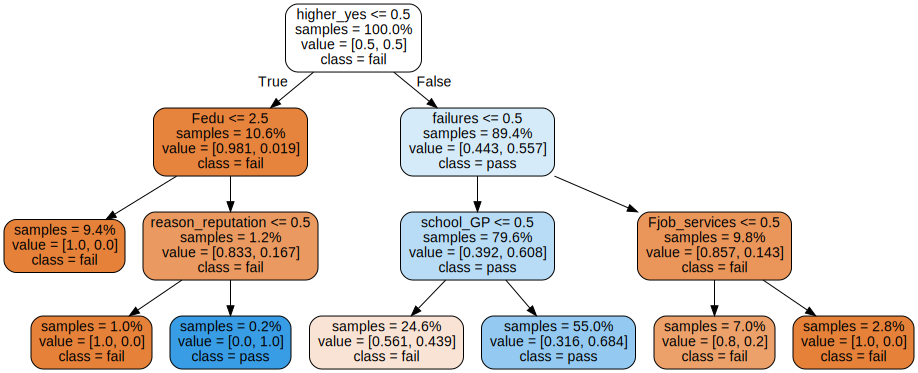

In [14]:
#visualizing the tree
import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,
                                feature_names=list(d_train_att), class_names=["fail", "pass"], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [15]:
t.score(d_test_att, d_test_pass)

0.704

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
#show avg score and +/- twho standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.07)


In [19]:
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() *2))

max depth: 1, Accuracy: 0.62 (+/- 0.03)
max depth: 2, Accuracy: 0.69 (+/- 0.06)
max depth: 3, Accuracy: 0.69 (+/- 0.07)
max depth: 4, Accuracy: 0.70 (+/- 0.07)
max depth: 5, Accuracy: 0.67 (+/- 0.06)
max depth: 6, Accuracy: 0.68 (+/- 0.06)
max depth: 7, Accuracy: 0.69 (+/- 0.07)
max depth: 8, Accuracy: 0.69 (+/- 0.10)
max depth: 9, Accuracy: 0.68 (+/- 0.10)
max depth: 10, Accuracy: 0.67 (+/- 0.08)
max depth: 11, Accuracy: 0.66 (+/- 0.13)
max depth: 12, Accuracy: 0.67 (+/- 0.11)
max depth: 13, Accuracy: 0.65 (+/- 0.12)
max depth: 14, Accuracy: 0.65 (+/- 0.15)
max depth: 15, Accuracy: 0.66 (+/- 0.12)
max depth: 16, Accuracy: 0.65 (+/- 0.10)
max depth: 17, Accuracy: 0.65 (+/- 0.12)
max depth: 18, Accuracy: 0.66 (+/- 0.10)
max depth: 19, Accuracy: 0.65 (+/- 0.12)


In [20]:
for max_depth in range(1,20):
    t = tree.DecisionTreeClassifier(criterion="gini", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() *2))

max depth: 1, Accuracy: 0.64 (+/- 0.05)
max depth: 2, Accuracy: 0.66 (+/- 0.10)
max depth: 3, Accuracy: 0.70 (+/- 0.06)
max depth: 4, Accuracy: 0.70 (+/- 0.07)
max depth: 5, Accuracy: 0.69 (+/- 0.07)
max depth: 6, Accuracy: 0.68 (+/- 0.07)
max depth: 7, Accuracy: 0.68 (+/- 0.05)
max depth: 8, Accuracy: 0.69 (+/- 0.07)
max depth: 9, Accuracy: 0.66 (+/- 0.09)
max depth: 10, Accuracy: 0.68 (+/- 0.05)
max depth: 11, Accuracy: 0.67 (+/- 0.08)
max depth: 12, Accuracy: 0.66 (+/- 0.06)
max depth: 13, Accuracy: 0.66 (+/- 0.08)
max depth: 14, Accuracy: 0.68 (+/- 0.06)
max depth: 15, Accuracy: 0.67 (+/- 0.06)
max depth: 16, Accuracy: 0.67 (+/- 0.05)
max depth: 17, Accuracy: 0.64 (+/- 0.07)
max depth: 18, Accuracy: 0.64 (+/- 0.06)
max depth: 19, Accuracy: 0.67 (+/- 0.05)
